In [1]:
import pandas as pd
data = pd.read_csv('Sub_Oil_VLCC_Monthly.csv')
data

C:\Users\Asus\AppData\Local\Temp\ipykernel_3496\474139866.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Unnamed: 0,542644,548869,93219,534737,36820,542661,10066,542456,24820,...,543880+543332+542784+530997+530785,535034+535038+542800+543348+543896,543924+543376+542828+535086,542832+542696+543380+543928,543932+542700+542836+543384,547724+543360+547728+543908+547720+542812+547716+531033,543888+542792+543340+531025,543372+543368+543920+543916+542692+542688+542824+542820,543364+543912+542684+542816,8852013+8852220+10743960+10778824+10778836+10743901+10778899+10779132
0,19910101,216.0400,404.7017,146.25000,281.3800,155.250,214.4300,268.750,204.9100,312.130,...,33122.130000,45839.530000,52842.860000,48596.370000,49887.600000,60081.570000,39845.120000,52658.090000,31296.190000,13.03000
1,19910201,149.0800,421.4927,115.66667,276.2600,95.750,140.6300,280.000,136.6500,307.280,...,56664.570000,73207.630000,89338.320000,80358.930000,85764.820000,81404.760000,68741.690000,80129.440000,54080.590000,13.15000
2,19910301,119.0500,368.1324,86.33333,190.7900,80.800,107.5100,199.200,106.0300,226.210,...,35121.180000,48163.420000,55941.780000,51293.410000,52934.020000,52744.530000,42298.800000,54990.750000,33230.870000,13.20000
3,19910401,121.9400,387.0115,79.66667,200.2700,77.000,110.7000,191.375,108.9800,235.200,...,19576.480000,30092.690000,31844.400000,30321.090000,29244.860000,36829.640000,23218.850000,36851.860000,18186.700000,13.51000
4,19910501,125.7900,462.6200,82.80000,199.6400,78.600,114.9600,197.200,112.9100,234.610,...,34175.280000,47063.810000,54475.450000,50017.240000,51492.530000,58368.520000,41137.780000,53887.000000,32315.440000,13.05000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,20230901,684.4500,576.0000,568.45000,1024.2000,603.600,711.9000,1054.800,659.7000,1022.900,...,30863.310778,25898.544058,48481.681142,45368.326005,50994.194898,55121.678414,32958.539815,54409.884701,36524.003032,11.51250
393,20231001,660.3750,656.1875,524.37500,970.3125,556.625,700.1250,1014.750,664.6875,973.000,...,42638.283715,50128.701163,63854.584045,65398.069490,70789.307587,65391.097779,45001.265013,72728.810396,49016.415023,11.68875
394,20231101,629.7500,688.1875,489.75000,919.5625,521.875,713.3125,936.125,686.7500,880.875,...,61926.342563,67212.546340,87067.677940,82487.096193,89553.720260,88069.251739,65533.770453,87299.379274,60576.883930,11.88625
395,20231201,588.4500,589.7000,494.65000,868.7500,503.700,681.8500,881.800,615.7000,804.650,...,52011.115747,59195.962123,70954.699113,67922.393093,71746.666697,72573.820342,54569.016270,73118.989011,47718.064695,11.77250


In [6]:
#Splitting the data into training and testing data

#whole data exclude the last row as X
X = data[:-1]

#target columns
good_result1_target_column = data['542236']
good_result2_target_column = data['67321']
mid_result_target_column = data['549295']
bad_result1_target_column = data['41108']
bad_result2_target_column = data['541982']

#target column exclude the first row as y
good1_y = good_result1_target_column[1:]
good2_y = good_result2_target_column[1:] 
mid_y = mid_result_target_column[1:] 
bad1_y = bad_result1_target_column[1:]
bad2_y = bad_result2_target_column[1:]

n = len(X)-36 #number of data points for training and testing

X_train = X.iloc[:n, :] #training data
X_test = X.iloc[n:, :] #testing data

#good1 target column training and testing data
good1_y_train = good1_y.iloc[:n]
good1_y_test = good1_y.iloc[n:]

#good2 target column training and testing data
good2_y_train = good2_y.iloc[:n]
good2_y_test = good2_y.iloc[n:]

#mid target column training and testing data
mid_y_train = mid_y.iloc[:n]
mid_y_test = mid_y.iloc[n:]

#bad1 target column training and testing data
bad1_y_train = bad1_y.iloc[:n]
bad1_y_test = bad1_y.iloc[n:]

#bad2 target column training and testing data
bad2_y_train = bad2_y.iloc[:n]
bad2_y_test = bad2_y.iloc[n:]


#Normalization
#get the first column of the data
time = data.iloc[:-1, 0].astype(int)

#Normalize the data
scaledX = data.iloc[:-1, 1:]  # Excluding the last row and first column for dates
scaledX = (scaledX - scaledX.min()) / (scaledX.max() - scaledX.min())

# Assign the 'date' column back as integers
scaledX.insert(0,'Unnamed: 0' ,time)

scaledX_train = scaledX.iloc[:n, :] #scaled training data
scaledX_test = scaledX.iloc[n:, :] #scaled testing data

print(scaledX_train)
print(scaledX_test)

#print(X_train)
#print(X_test)
#print(good1_y_train)
#print(good1_y_test)
#print(good2_y_train)
#print(good2_y_test)
#print(mid_y_train)
#print(mid_y_test)
#print(bad1_y_train)
#print(bad1_y_test)
#print(bad2_y_train)
#print(bad2_y_test)

print("X_train_Head: ", X_train.iloc[0,0])
print("X_train_Tail: ", X_train.iloc[-1,0])
print("X_test_Head: ", X_test.iloc[0,0])
print("X_test_Tail: ", X_test.iloc[-1,0])
print("scaledX_train_Head: ", scaledX_train.iloc[0,0])
print("scaledX_train_Tail: ", scaledX_train.iloc[-1,0])
print("scaledX_test_Head: ", scaledX_test.iloc[0,0])
print("scaledX_test_Tail: ", scaledX_test.iloc[-1,0])



     Unnamed: 0    542644    548869     93219    534737     36820    542661  \
0      19910101  0.127623  0.080262  0.129633  0.117897  0.137853  0.114864   
1      19910201  0.049616  0.086035  0.084961  0.114322  0.050455  0.044667   
2      19910301  0.014632  0.067689  0.042116  0.054636  0.028496  0.013164   
3      19910401  0.017999  0.074180  0.032378  0.061256  0.022914  0.016199   
4      19910501  0.022484  0.100174  0.036955  0.060817  0.025264  0.020251   
..          ...       ...       ...       ...       ...       ...       ...   
355    20200801  0.285795  0.018480  0.362699  0.195189  0.326326  0.269199   
356    20200901  0.273272  0.036250  0.345810  0.172275  0.310076  0.253921   
357    20201001  0.266908  0.049078  0.339383  0.172659  0.310370  0.244100   
358    20201101  0.289509  0.050281  0.357130  0.196192  0.331742  0.249344   
359    20201201  0.330720  0.063454  0.391273  0.232243  0.373605  0.299043   

        10066    542456     24820  ...  543880+5433

In [3]:
# The models we use to do the prediction
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge


def model_fit_predict(y_train):
    predictions = {}  # Initialize an empty dictionary

    # Decision Tree Regressor
    DT = DecisionTreeRegressor(random_state=42)
    DT.fit(X_train, y_train)
    predictions['DT'] = DT.predict(X_test)
    predictions['Scaled DT'] = DT.predict(scaledX_test)

    # Linear Regression
    LR = LinearRegression()
    LR.fit(X_train, y_train)
    predictions['LR'] = LR.predict(X_test)
    predictions['Scaled LR'] = LR.predict(scaledX_test)

    # Lasso Regression
    Lasso_model = Lasso()
    Lasso_model.fit(X_train, y_train)
    predictions['Lasso'] = Lasso_model.predict(X_test)
    predictions['Scaled Lasso'] = Lasso_model.predict(scaledX_test)

    # Support Vector Regression
    SVR_model = SVR()
    SVR_model.fit(X_train, y_train)
    predictions['SVR'] = SVR_model.predict(X_test)
    predictions['Scaled SVR'] = SVR_model.predict(scaledX_test)

    # Multi-Layer Perceptron Regressor
    MLP = MLPRegressor(hidden_layer_sizes=(350,150,50), max_iter=1000)
    MLP.fit(X_train, y_train)
    predictions['MLP'] = MLP.predict(X_test)
    predictions['Scaled MLP'] = MLP.predict(scaledX_test)

    # Gradient Boosting Regressor
    GBR = GradientBoostingRegressor()
    GBR.fit(X_train, y_train)
    predictions['GBR'] = GBR.predict(X_test)
    predictions['Scaled GBR'] = GBR.predict(scaledX_test)

    # Random Forest Regressor
    RFR = RandomForestRegressor()
    RFR.fit(X_train, y_train)
    predictions['RFR'] = RFR.predict(X_test)
    predictions['Scaled RFR'] = RFR.predict(scaledX_test)

    #Ridge Regression
    RR = Ridge()
    RR.fit(X_train, y_train)
    predictions['RR'] = RR.predict(X_test)
    predictions['Scaled RR'] = RR.predict(scaledX_test)

    return predictions

good1_predictions = model_fit_predict(good1_y_train)
good2_predictions = model_fit_predict(good2_y_train)
mid_predictions = model_fit_predict(mid_y_train)
bad1_predictions = model_fit_predict(bad1_y_train)
bad2_predictions = model_fit_predict(bad2_y_train)

print(good1_predictions)
# print(good2_predictions)
# print(mid_predictions)
# print(bad1_predictions)
# print(bad2_predictions)





c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.073e+08, tolerance: 8.337e+06
  model = cd_fast.enet_coordinate_descent(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:243: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.114e+02, tolerance: 1.579e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\Asus\AppData

{'DT': array([26190.52, 26190.52, 25924.44, 26190.52, 23370.15, 26190.52,
       26190.52, 27437.5 , 27437.5 , 25073.01, 28510.48, 27437.5 ,
       27437.5 , 27437.5 , 23370.15, 25073.01, 27437.5 , 28510.48,
       28510.48, 33000.  , 40000.  , 44355.77, 64904.01, 40159.3 ,
       50875.  , 60000.  , 64904.01, 40159.3 , 40000.  , 40000.  ,
       41356.63, 40159.3 , 64904.01, 40159.3 , 64904.01, 64904.01]), 'Scaled DT': array([22199.43, 22199.43, 22199.43, 22199.43, 22199.43, 22199.43,
       22199.43, 22199.43, 22199.43, 22199.43, 22199.43, 22199.43,
       22199.43, 22199.43, 22199.43, 22199.43, 22199.43, 22199.43,
       22199.43, 22199.43, 22199.43, 22199.43, 22199.43, 22199.43,
       22199.43, 22199.43, 22199.43, 22199.43, 22199.43, 22199.43,
       22199.43, 22199.43, 22199.43, 22199.43, 22199.43, 22199.43]), 'LR': array([  47639.62406022,   76291.28892127,   84007.60211534,
         84367.32291944,   92340.22236385,   54781.46611355,
         61810.77499469,   45423.7240802 ,  

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:243: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


In [5]:
import numpy as np
def calculate_accuracies(predictions, y_test):
    average_accuracies = {}
    individual_accuracies = {}

    for model, model_predictions in predictions.items():
        # Calculate accuracy for each prediction
        accuracies = (1 - np.abs(model_predictions - y_test) / y_test) * 100

        # Calculate average accuracy for the model
        average_accuracy = np.mean(accuracies)

        # Store the average accuracy, rounded to two decimal places
        average_accuracies[model] = round(average_accuracy, 2)

        # Store individual accuracies
        individual_accuracies[model] = accuracies

    return average_accuracies, individual_accuracies

# Calculate accuracies
good1_avg_acc, good1_ind_acc = calculate_accuracies(good1_predictions, good1_y_test)
good2_avg_acc, good2_ind_acc = calculate_accuracies(good2_predictions, good2_y_test)
mid_avg_acc, mid_ind_acc = calculate_accuracies(mid_predictions, mid_y_test)
bad1_avg_acc, bad1_ind_acc = calculate_accuracies(bad1_predictions, bad1_y_test)
bad2_avg_acc, bad2_ind_acc = calculate_accuracies(bad2_predictions, bad2_y_test)


#pick the best model for each target column
good1_best_model = max(good1_avg_acc, key=good1_avg_acc.get)
good2_best_model = max(good2_avg_acc, key=good2_avg_acc.get)
mid_best_model = max(mid_avg_acc, key=mid_avg_acc.get)
bad1_best_model = max(bad1_avg_acc, key=bad1_avg_acc.get)
bad2_best_model = max(bad2_avg_acc, key=bad2_avg_acc.get)

print("Avg_Good1: ", good1_avg_acc)
#print(good2_ind_acc)
print("Avg_Good2: ", good2_avg_acc)
#print(mid_ind_acc)
print("Avg_Mid: ", mid_avg_acc)
#print(bad1_ind_acc)
print("Avg_Bad1: ", bad1_avg_acc)
#print(bad2_ind_acc)
print("Avg_Bad2: ", bad2_avg_acc)

print("Best_Good1: ", good1_best_model, good1_avg_acc[good1_best_model]) 
print("Best_Good2: ", good2_best_model, good2_avg_acc[good2_best_model])
print("Best_Mid: ", mid_best_model, mid_avg_acc[mid_best_model])
print("Best_Bad1: ", bad1_best_model, bad1_avg_acc[bad1_best_model])
print("Best_Bad2: ", bad2_best_model, bad2_avg_acc[bad2_best_model])

Avg_Good1:  {'DT': 84.79, 'Scaled DT': 70.26, 'LR': -183.68, 'Scaled LR': -3750.15, 'Lasso': 17.35, 'Scaled Lasso': -128.88, 'SVR': 61.08, 'Scaled SVR': 61.07, 'MLP': -43.91, 'Scaled MLP': -251.2, 'GBR': 86.54, 'Scaled GBR': 68.84, 'RFR': 88.16, 'Scaled RFR': 73.16, 'RR': 18.01, 'Scaled RR': 20.83}
Avg_Good2:  {'DT': 96.47, 'Scaled DT': 58.97, 'LR': 70.49, 'Scaled LR': -220.21, 'Lasso': 94.69, 'Scaled Lasso': 4.24, 'SVR': 79.18, 'Scaled SVR': 81.28, 'MLP': -61053.38, 'Scaled MLP': -22815.88, 'GBR': 97.5, 'Scaled GBR': 60.31, 'RFR': 96.94, 'Scaled RFR': 61.56, 'RR': 81.81, 'Scaled RR': -24.7}
Avg_Mid:  {'DT': 79.45, 'Scaled DT': 63.59, 'LR': -212.78, 'Scaled LR': -4088.68, 'Lasso': 78.32, 'Scaled Lasso': -116.99, 'SVR': 69.69, 'Scaled SVR': 70.82, 'MLP': -1141583.52, 'Scaled MLP': -1742081.23, 'GBR': 86.41, 'Scaled GBR': 64.13, 'RFR': 88.86, 'Scaled RFR': 68.67, 'RR': -24.0, 'Scaled RR': -169.42}
Avg_Bad1:  {'DT': 44.27, 'Scaled DT': 70.41, 'LR': -734.57, 'Scaled LR': -10228.91, 'Lasso'

C:\Users\Asus\AppData\Local\Temp\ipykernel_3496\2235045739.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Datetime'] = pd.to_datetime(X_test['Unnamed: 0'], format='%Y%m%d')


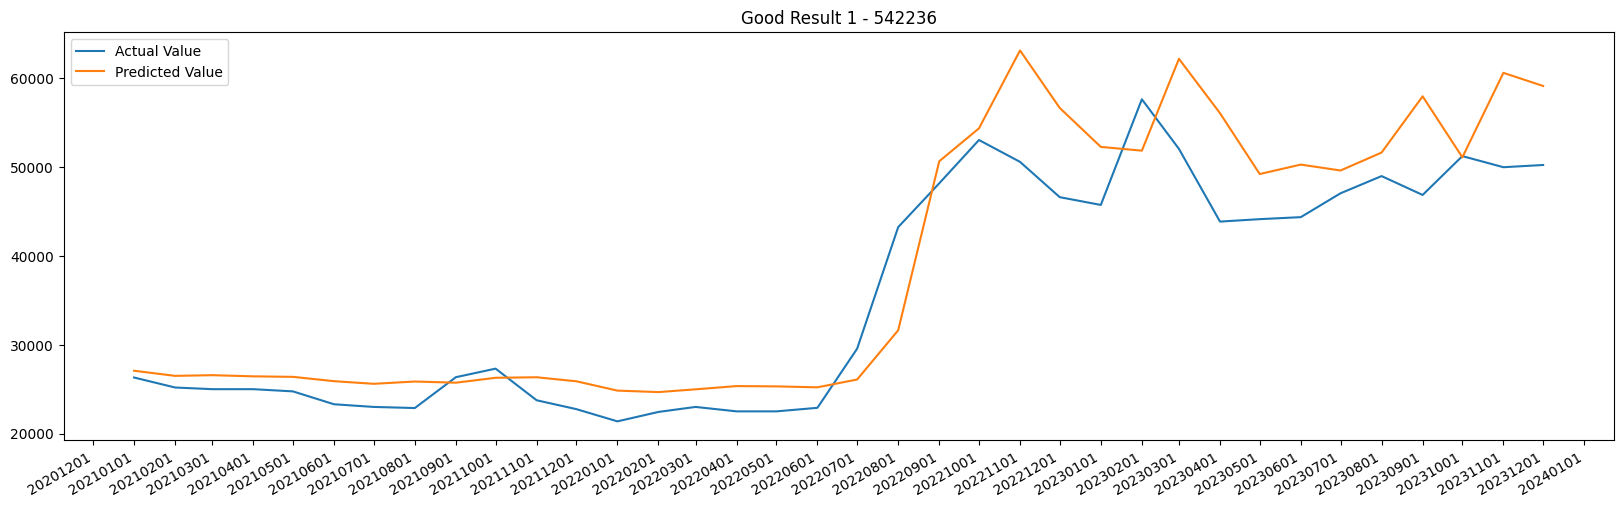

C:\Users\Asus\AppData\Local\Temp\ipykernel_3496\2235045739.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Datetime'] = pd.to_datetime(X_test['Unnamed: 0'], format='%Y%m%d')


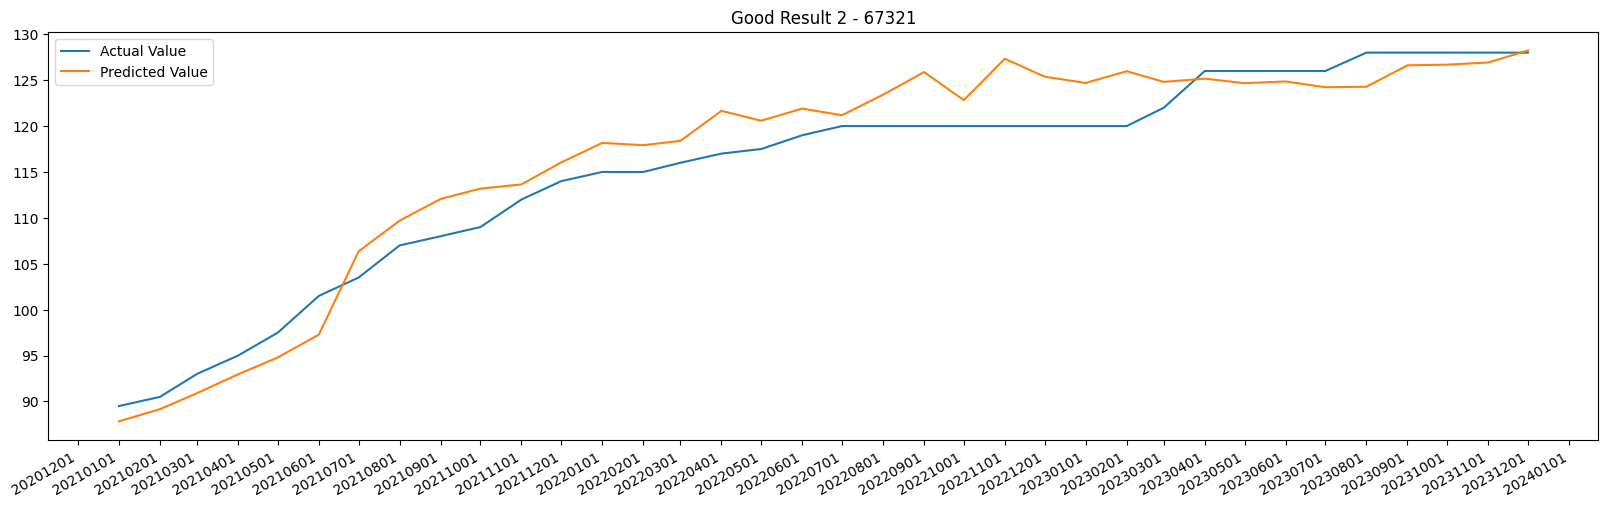

C:\Users\Asus\AppData\Local\Temp\ipykernel_3496\2235045739.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Datetime'] = pd.to_datetime(X_test['Unnamed: 0'], format='%Y%m%d')


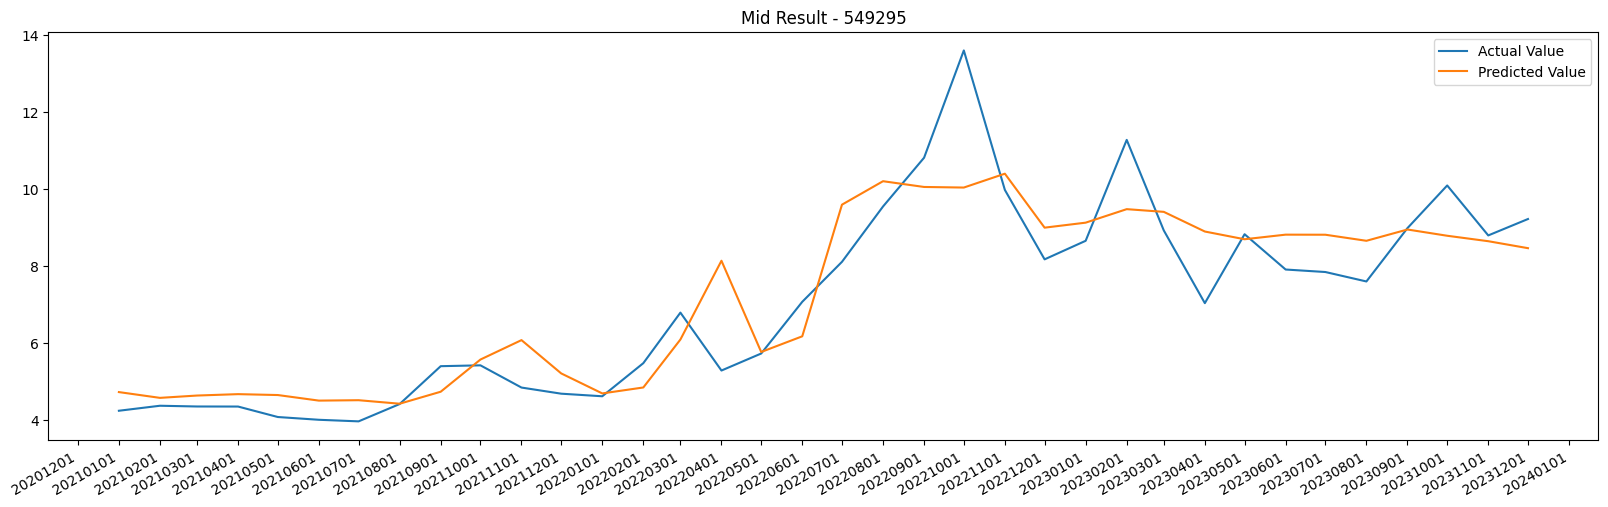

C:\Users\Asus\AppData\Local\Temp\ipykernel_3496\2235045739.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Datetime'] = pd.to_datetime(X_test['Unnamed: 0'], format='%Y%m%d')


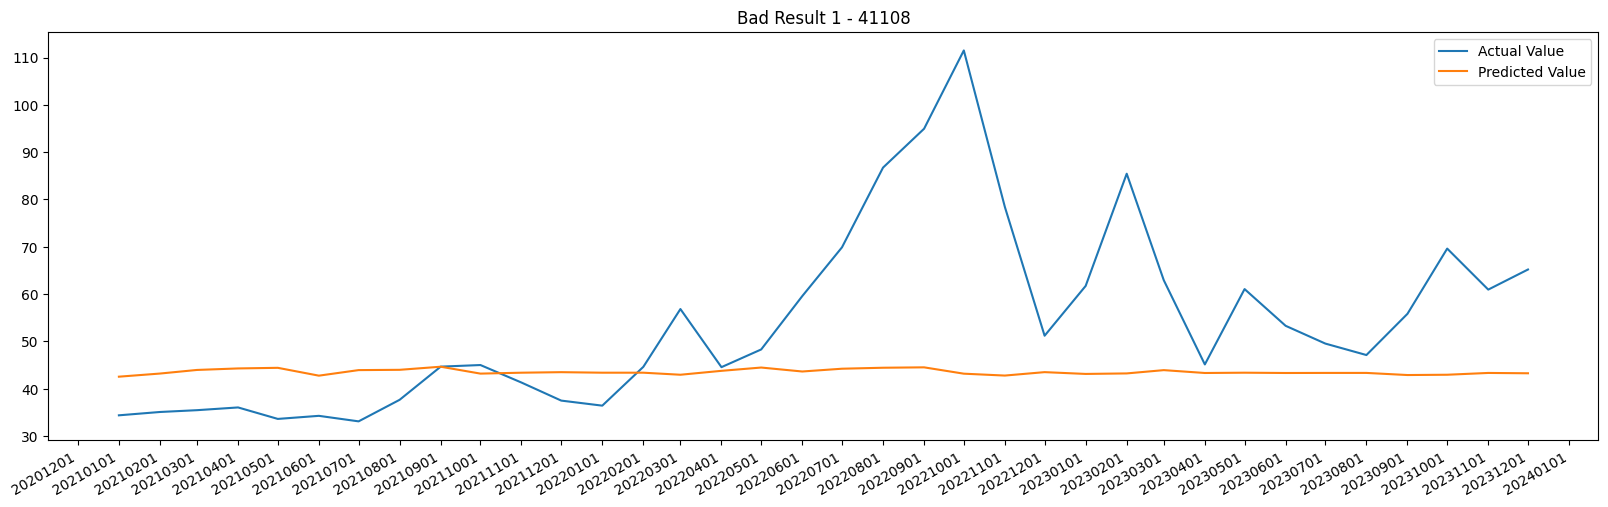

C:\Users\Asus\AppData\Local\Temp\ipykernel_3496\2235045739.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Datetime'] = pd.to_datetime(X_test['Unnamed: 0'], format='%Y%m%d')


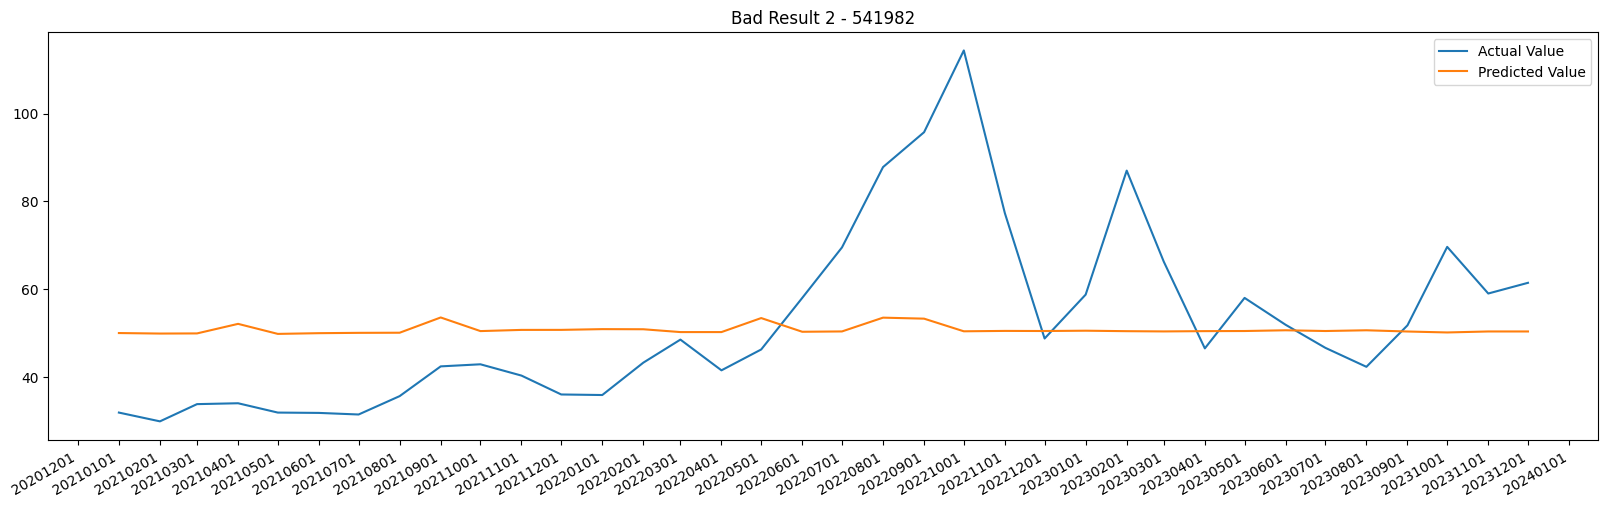

In [7]:
# plot a graph of the best model for each target column that show the prediction and the actual value
#x axis is the index of the testing data
#y axis is the actual value and the predicted value
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

def plot_best_model(best_model, y_test, predictions, title):
    X_test['Datetime'] = pd.to_datetime(X_test['Unnamed: 0'], format='%Y%m%d')
    plt.figure(figsize=(20,6))
    plt.plot(X_test['Datetime'], y_test, label='Actual Value')
    plt.plot(X_test['Datetime'], predictions[best_model], label='Predicted Value')
    plt.title(title)
    plt.legend()
     # Format the dates on the x-axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y%m%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    
    # Rotate and align the tick labels so they look better
    plt.gcf().autofmt_xdate()
    plt.show()

plot_best_model(good1_best_model, good1_y_test, good1_predictions, 'Good Result 1 - 542236')
plot_best_model(good2_best_model, good2_y_test, good2_predictions, 'Good Result 2 - 67321')
plot_best_model(mid_best_model, mid_y_test, mid_predictions, 'Mid Result - 549295')
plot_best_model(bad1_best_model, bad1_y_test, bad1_predictions, 'Bad Result 1 - 41108')
plot_best_model(bad2_best_model, bad2_y_test, bad2_predictions, 'Bad Result 2 - 541982')



In [8]:
# write an csv file
# first colume is the time series, this is first column of the X_test
# second column is the actual value, this is the y_test
# third column is the predicted value, this is the y_pred
# fourth column is the accuracy, this is the accuracy
# fifth column is the average accuracy, this is the avg_accuracy

import csv

def write_csv(y_test, y_pred, ind_acc, avg_acc, filename):
    with open(filename, 'w', newline='') as file:
        X_test_local = X_test.set_index('Unnamed: 0')
        writer = csv.writer(file)
        writer.writerow(["Time Series", "Target Value", "Predicted Value", "Accuracy", "Average Accuracy"])
        for i in range(len(y_test)):
            if i == 0:
                writer.writerow([X_test_local.index[i], y_test.iloc[i], y_pred[i], ind_acc.loc[361+i], avg_acc])
            else:
                writer.writerow([X_test_local.index[i], y_test.iloc[i], y_pred[i], ind_acc.loc[361+i], ""])

write_csv(good1_y_test, good1_predictions[good1_best_model], good1_ind_acc[good1_best_model], good1_avg_acc[good1_best_model], '542236_good1.csv')
write_csv(good2_y_test, good2_predictions[good2_best_model], good2_ind_acc[good2_best_model], good2_avg_acc[good2_best_model], '67321_good2.csv')
write_csv(mid_y_test, mid_predictions[mid_best_model], mid_ind_acc[mid_best_model], mid_avg_acc[mid_best_model], '549295_mid.csv')
write_csv(bad1_y_test, bad1_predictions[bad1_best_model], bad1_ind_acc[bad1_best_model], bad1_avg_acc[bad1_best_model], '41108_bad1.csv')
write_csv(bad2_y_test, bad2_predictions[bad2_best_model], bad2_ind_acc[bad2_best_model], bad2_avg_acc[bad2_best_model], '541982_bad2.csv')     